# Roteiro de trabalho

### Tempos dos vídeos
- (IT) Insulina Tradicional (15:00) $\rightarrow$ 900 segundos
- (GT) Glucagon Tradicional (14:57) $\rightarrow$ 897 segundos
- (IA) Insulina Ativa (19:26) $\rightarrow$ 1166 segundos
- (GA) Glucagon Ativa (20:43) $\rightarrow$ 1243 segundos

### Participante deste roteiro:
- Daniella: IT e GA

In [33]:
# imports de bibliotecas

import numpy as np
import mne
from scipy.signal import welch
import matplotlib.pyplot as plt

In [34]:
# definição do info (MNE)

n_channels = 8
ch_types = ['eeg'] * n_channels
sfreq = 250
ch_names = ["F3", "Fz", "F4", "C3", "Cz", "C4", "P3", "P4"]
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
info.set_montage("standard_1020")

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,11 points
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


Andre Glucagon Ativo

basal -> 0 até 60 segundos          --->    0       até 15000

aula  -> 60 até 1303 segundos       --->    15000   até 325750

teste -> 1320 segundos até final    --->    330000  até final     


Andre Insulina Tradicional

basal -> 0 até 20 segundos          --->    0       até 5000

aula  -> 20 até 915 segundos        --->    5000    até 228750

teste -> 0 até 180 segundos         --->    0       até 45000     


Andre Teste Final

teste -> 1320 segundos até final    --->    79200   até final     


In [35]:
# carregamento e organização dos dados de: Andre

# aula -> 15000 até 325750 (ga) [1243 segundos]
# teste -> 330000 até final (ga) [125 segundos]
ga = 'dataset/AndreTonelo/GlucagonAtivo/OpenBCISession_2023-10-25_17-37-01_AndreToneloGlucagonAtivo/OpenBCI-RAW-2023-10-25_17-43-36.txt'
ga_ob = np.loadtxt(ga, delimiter=',', skiprows=5, usecols=range(1, 9))
data_ga = ga_ob[15000:325750,:]
data_ga_test = ga_ob[338000:369250,:]
print(ga_ob.shape,"ga_ob")
print(data_ga.shape)
print(data_ga_test.shape)

# basal -> 1250 até 15000
data_basal = ga_ob[1250:15000,:]
data_basal_raw = mne.io.RawArray(data_basal.T, info)


# aula -> 5000 até 228750 (it1) | 500 até 111750 (it2) [895 segundos]
# teste -> 0 até 45000 (it2) [180 segundos]
it = ['dataset/AndreTonelo/InsulinaTradicional/OpenBCISession_2023-10-04_16-52-31AndreToneloAulatradicional/OpenBCI-RAW-2023-10-04_16-53-17.txt',
      'dataset/AndreTonelo/InsulinaTradicional/OpenBCISession_2023-10-04_17-11-35andretonelotestetradicional/OpenBCI-RAW-2023-10-04_17-12-22.txt']
it_ob = [np.loadtxt(txt, delimiter=',', skiprows=5, usecols=range(1, 9)) for txt in it]
data_it = it_ob[0][5000:228750,:]
data_it_test = it_ob[1][500:45000,:]
#print(it_ob[0].shape, it_ob[1].shape, "it_ob")
print(data_it.shape)
print(data_it_test.shape)


# 26250 até 152250 [504 segundos]
test = ['dataset/AndreTonelo/testefinal/OpenBCI-RAW-2023-11-14_17-23-33 andre min basal.txt',
      'dataset/AndreTonelo/testefinal/OpenBCI-RAW-2023-11-14_17-25-16 andre teste final.txt']
test_ob = [np.loadtxt(txt, delimiter=',', skiprows=5, usecols=range(1, 9)) for txt in test]
data_test = test_ob[1][5635:131635,:]
#data_test_amostra1 = test_ob[1][35750:47500,:]#amostra_teste_1
#data_test_amostra2 = test_ob[1][53750:58750,:]#amostra_teste_2


#print(test_ob[0].shape,test_ob[1].shape,"test_ob")
print(data_test.shape)


X = {
    'ga': mne.io.RawArray(data_ga.T, info),
    'ga_test': mne.io.RawArray(data_ga_test.T, info),
    'it': mne.io.RawArray(data_it.T, info),
    'it_test': mne.io.RawArray(data_it_test.T, info),
    'test': mne.io.RawArray(data_test.T, info)
}


(372286, 8) ga_ob
(310750, 8)
(31250, 8)
Creating RawArray with float64 data, n_channels=8, n_times=14500
    Range : 0 ... 14499 =      0.000 ...    57.996 secs
Ready.
(223750, 8)
(44500, 8)
(126000, 8)
Creating RawArray with float64 data, n_channels=8, n_times=310750
    Range : 0 ... 310749 =      0.000 ...  1242.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=31250
    Range : 0 ... 31249 =      0.000 ...   124.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=223750
    Range : 0 ... 223749 =      0.000 ...   894.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=44500
    Range : 0 ... 44499 =      0.000 ...   177.996 secs
Ready.
Creating RawArray with float64 data, n_channels=8, n_times=126000
    Range : 0 ... 125999 =      0.000 ...   503.996 secs
Ready.


In [36]:
# filtragem de todos os dados

for key in X:
    X[key].notch_filter(freqs=60)
    X[key].filter(l_freq=4, h_freq=100)
    print(X[key].n_times)
    print(X[key].times)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband e

In [37]:
print(X['ga'].n_times)

310750


In [38]:
print(X['ga'].times[-1])

1242.996


In [39]:
import sys

sr = 250            # taxa de amostragem
jump = 3            # 5 segundos de buffer
size = sr * jump    # quantidade de pontos avaliados

# Definir os limites das bandas de frequência (em Hz)
theta_band = (4, 8)       # Theta: 4 - 8 Hz
alpha_band = (8, 13)      # Alpha: 8 - 13 Hz
beta_band = (13, 30)      # Beta: 13 - 30 Hz
gamma_band = (30, 100)    # Gamma: 30 - 100 Hz
total_pc = {}
data_names = ('ga','ga_test','it','it_test','test')
datas = [X['ga'], X['ga_test'], X['it'], X['it_test'], X['test']]
for k, data in enumerate(datas):
    results = [0, 0, 0, 0]
    for i in range(0, data.n_times, 250):
        if i + size < data.n_times:
            cut = data.copy().crop(tmin=data.times[i], tmax=data.times[i]+jump)
        else:
            cut = data.copy().crop(tmin=data.times[i], tmax=data.times[-1])  
        # Número de pontos por segmento
        nperseg = 128
        # Quantidade de sobreposição entre segmentos
        noverlap = nperseg // 2
        cut.set_eeg_reference(ref_channels='average')
        cut = cut.get_data()

        

        # realizando a média dos 8 eletrodos
        # no caso do trabalho, analizar os canais separadamente.
        #   Para isso, vamos aplicar o filtro espacial, no qual
        #   podemos utilizar algoritmos específicos para a análise
        #   de EEG utilizando o CAR (Common Average Reference).
        freqs, psd = welch(cut, fs=sr, nperseg=nperseg, noverlap=noverlap)
        X = np.average(psd, axis=0)

        # Encontrar os índices correspondentes às frequências de interesse
        theta_idxs = np.where((freqs >= theta_band[0]) & (freqs <= theta_band[1]))[0]
        alpha_idxs = np.where((freqs >= alpha_band[0]) & (freqs <= alpha_band[1]))[0]
        beta_idxs = np.where((freqs >= beta_band[0]) & (freqs <= beta_band[1]))[0]
        gamma_idxs = np.where((freqs >= gamma_band[0]) & (freqs <= gamma_band[1]))[0]
    
        # Calcular a potência em cada banda de frequência por meio da integração da PSD
        bands = [np.sum(X[theta_idxs]), np.sum(X[alpha_idxs]), np.sum(X[beta_idxs]), np.sum(X[gamma_idxs])]
        # calculando a pontuação de cada banda para mostrar a porcentagem futura
        results[np.argmax(bands)] += 1
        


    total = sum(results)
    percentages = [round((count/total) * 100, 2) for count in results]
    print(data.__str__())
    total_pc[data_names[k]] = percentages
print(total_pc)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
E

Mostrando os graficos de barra dos resultados.

In [40]:
from matplotlib import rcParams

rcParams['figure.figsize'] = [6., 4.]

def plot_bar(x):
    colors = ('orange', 'green', 'blue', 'purple')
    bars = plt.bar(('theta', 'alpha', 'beta', 'gamma'), x, color=colors)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    plt.title('Porcentagem da potência em cada banda de frequência')
    plt.xlabel('Banda de Frequência')
    plt.ylabel('Porcentagem durante a atividade')

    # Exibir o gráfico
    plt.show()


Aplicando os valores das porcentagens obtidas na função do grafico

Glucagon Ativa


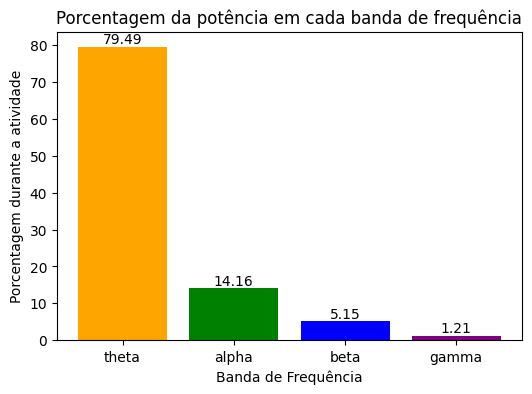

Glucagon Ativa - Teste


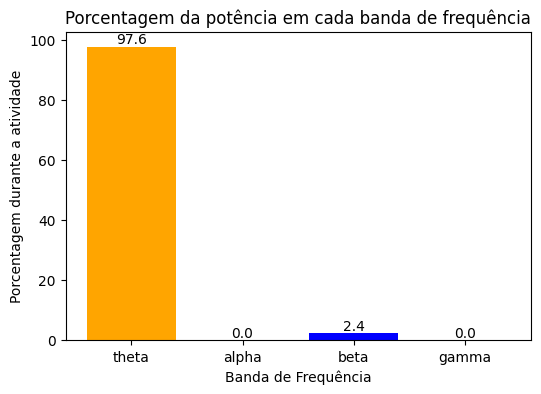

Insulina Tradicional


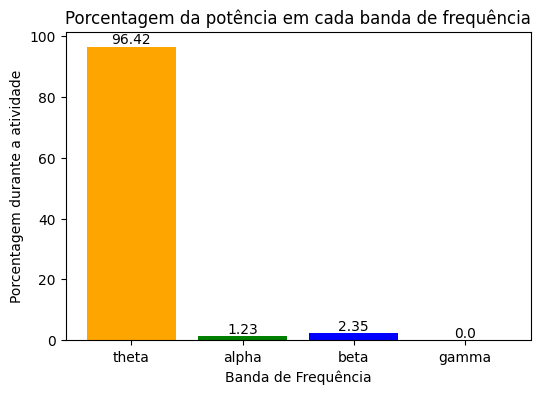

Insulina Tradicional - Teste


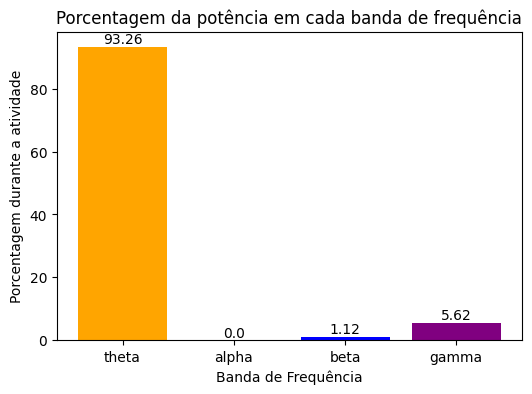

Teste Final


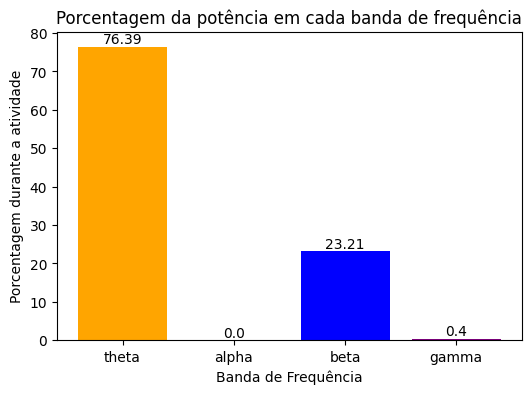

In [41]:
print('Glucagon Ativa')
plot_bar(total_pc['ga'])
print('Glucagon Ativa - Teste')
plot_bar(total_pc['ga_test'])
print('Insulina Tradicional')
plot_bar(total_pc['it'])
print('Insulina Tradicional - Teste')
plot_bar(total_pc['it_test'])
print('Teste Final')
plot_bar(total_pc['test'])